In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## 1.Importing Data

In [2]:
df = pd.read_csv('Crop_Recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## 2. Preprocessing Data

### 2.1 Encoding Data

In [7]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [8]:
df['label'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

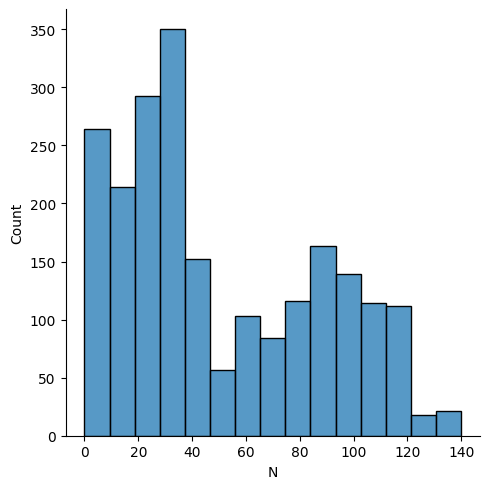

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['N'])
plt.show()

### 2.2 Spliting Data

In [10]:
X = df.drop('label', axis=1)
y = df['label']

In [11]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Scale Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [14]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [15]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

## 3. Model

### 3.1 Building Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### 3.2 Training Model

In [18]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
55/55 [==============================] - 3s 22ms/step - loss: 3.0544 - accuracy: 0.1307 - val_loss: 2.9839 - val_accuracy: 0.2568
Epoch 2/100
55/55 [==============================] - 1s 14ms/step - loss: 2.9006 - accuracy: 0.3034 - val_loss: 2.7883 - val_accuracy: 0.3477
Epoch 3/100
55/55 [==============================] - 1s 11ms/step - loss: 2.6282 - accuracy: 0.3756 - val_loss: 2.4474 - val_accuracy: 0.4295
Epoch 4/100
55/55 [==============================] - 1s 10ms/step - loss: 2.2202 - accuracy: 0.5205 - val_loss: 2.0156 - val_accuracy: 0.5295
Epoch 5/100
55/55 [==============================] - 0s 7ms/step - loss: 1.7845 - accuracy: 0.5989 - val_loss: 1.6005 - val_accuracy: 0.6386
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 1.4194 - accuracy: 0.6722 - val_loss: 1.3061 - val_accuracy: 0.6955
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 1.1499 - accuracy: 0.7602 - val_loss: 1.0697 - val_accuracy: 0.7614
Epoch 8/1

### 3.3 Evaluate Model Performance

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


14/14 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9682
Test Loss: 0.0790659710764885, Test Accuracy: 0.9681817889213562


In [20]:
predictions = model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


In [21]:
print(f'Predictions: {predictions}')

Predictions: [[2.5535565e-23 1.8306526e-18 1.5171321e-14 ... 5.6042433e-09
  8.1424194e-21 2.5672649e-04]
 [7.1198440e-20 6.4168442e-15 1.7569290e-12 ... 1.4708969e-06
  1.6953276e-14 9.9755174e-01]
 [2.8373580e-12 2.9040154e-10 6.5252027e-07 ... 7.0423715e-07
  2.0590073e-14 1.4421926e-13]
 ...
 [7.4776750e-19 1.5184335e-09 1.9616850e-09 ... 2.6498049e-16
  2.8656594e-15 1.3295749e-05]
 [1.2046139e-15 1.2291367e-06 1.1115062e-07 ... 4.6937162e-15
  2.3514339e-13 1.2612879e-05]
 [1.0661704e-12 5.4873325e-11 4.0643791e-09 ... 8.3779995e-21
  8.2373279e-13 5.1926379e-22]]


In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming model is your loaded Sequential model
predictions = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display other classification metrics
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))


14/14 [==============================] - 0s 2ms/step
Accuracy: 0.9681818181818181
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.90      0.92        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.90      0.83      0.86        23
           9       0.95      1.00      0.98        20
          10       0.79      1.00      0.88        11
          11       1.00      0.90      0.95        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17

## 4. Save Model

In [23]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from google.colab import files

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'models')

In [26]:
from google.colab import files
files.download('models/model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>